In [4]:
df['waterfront'].fillna(0,inplace=True)

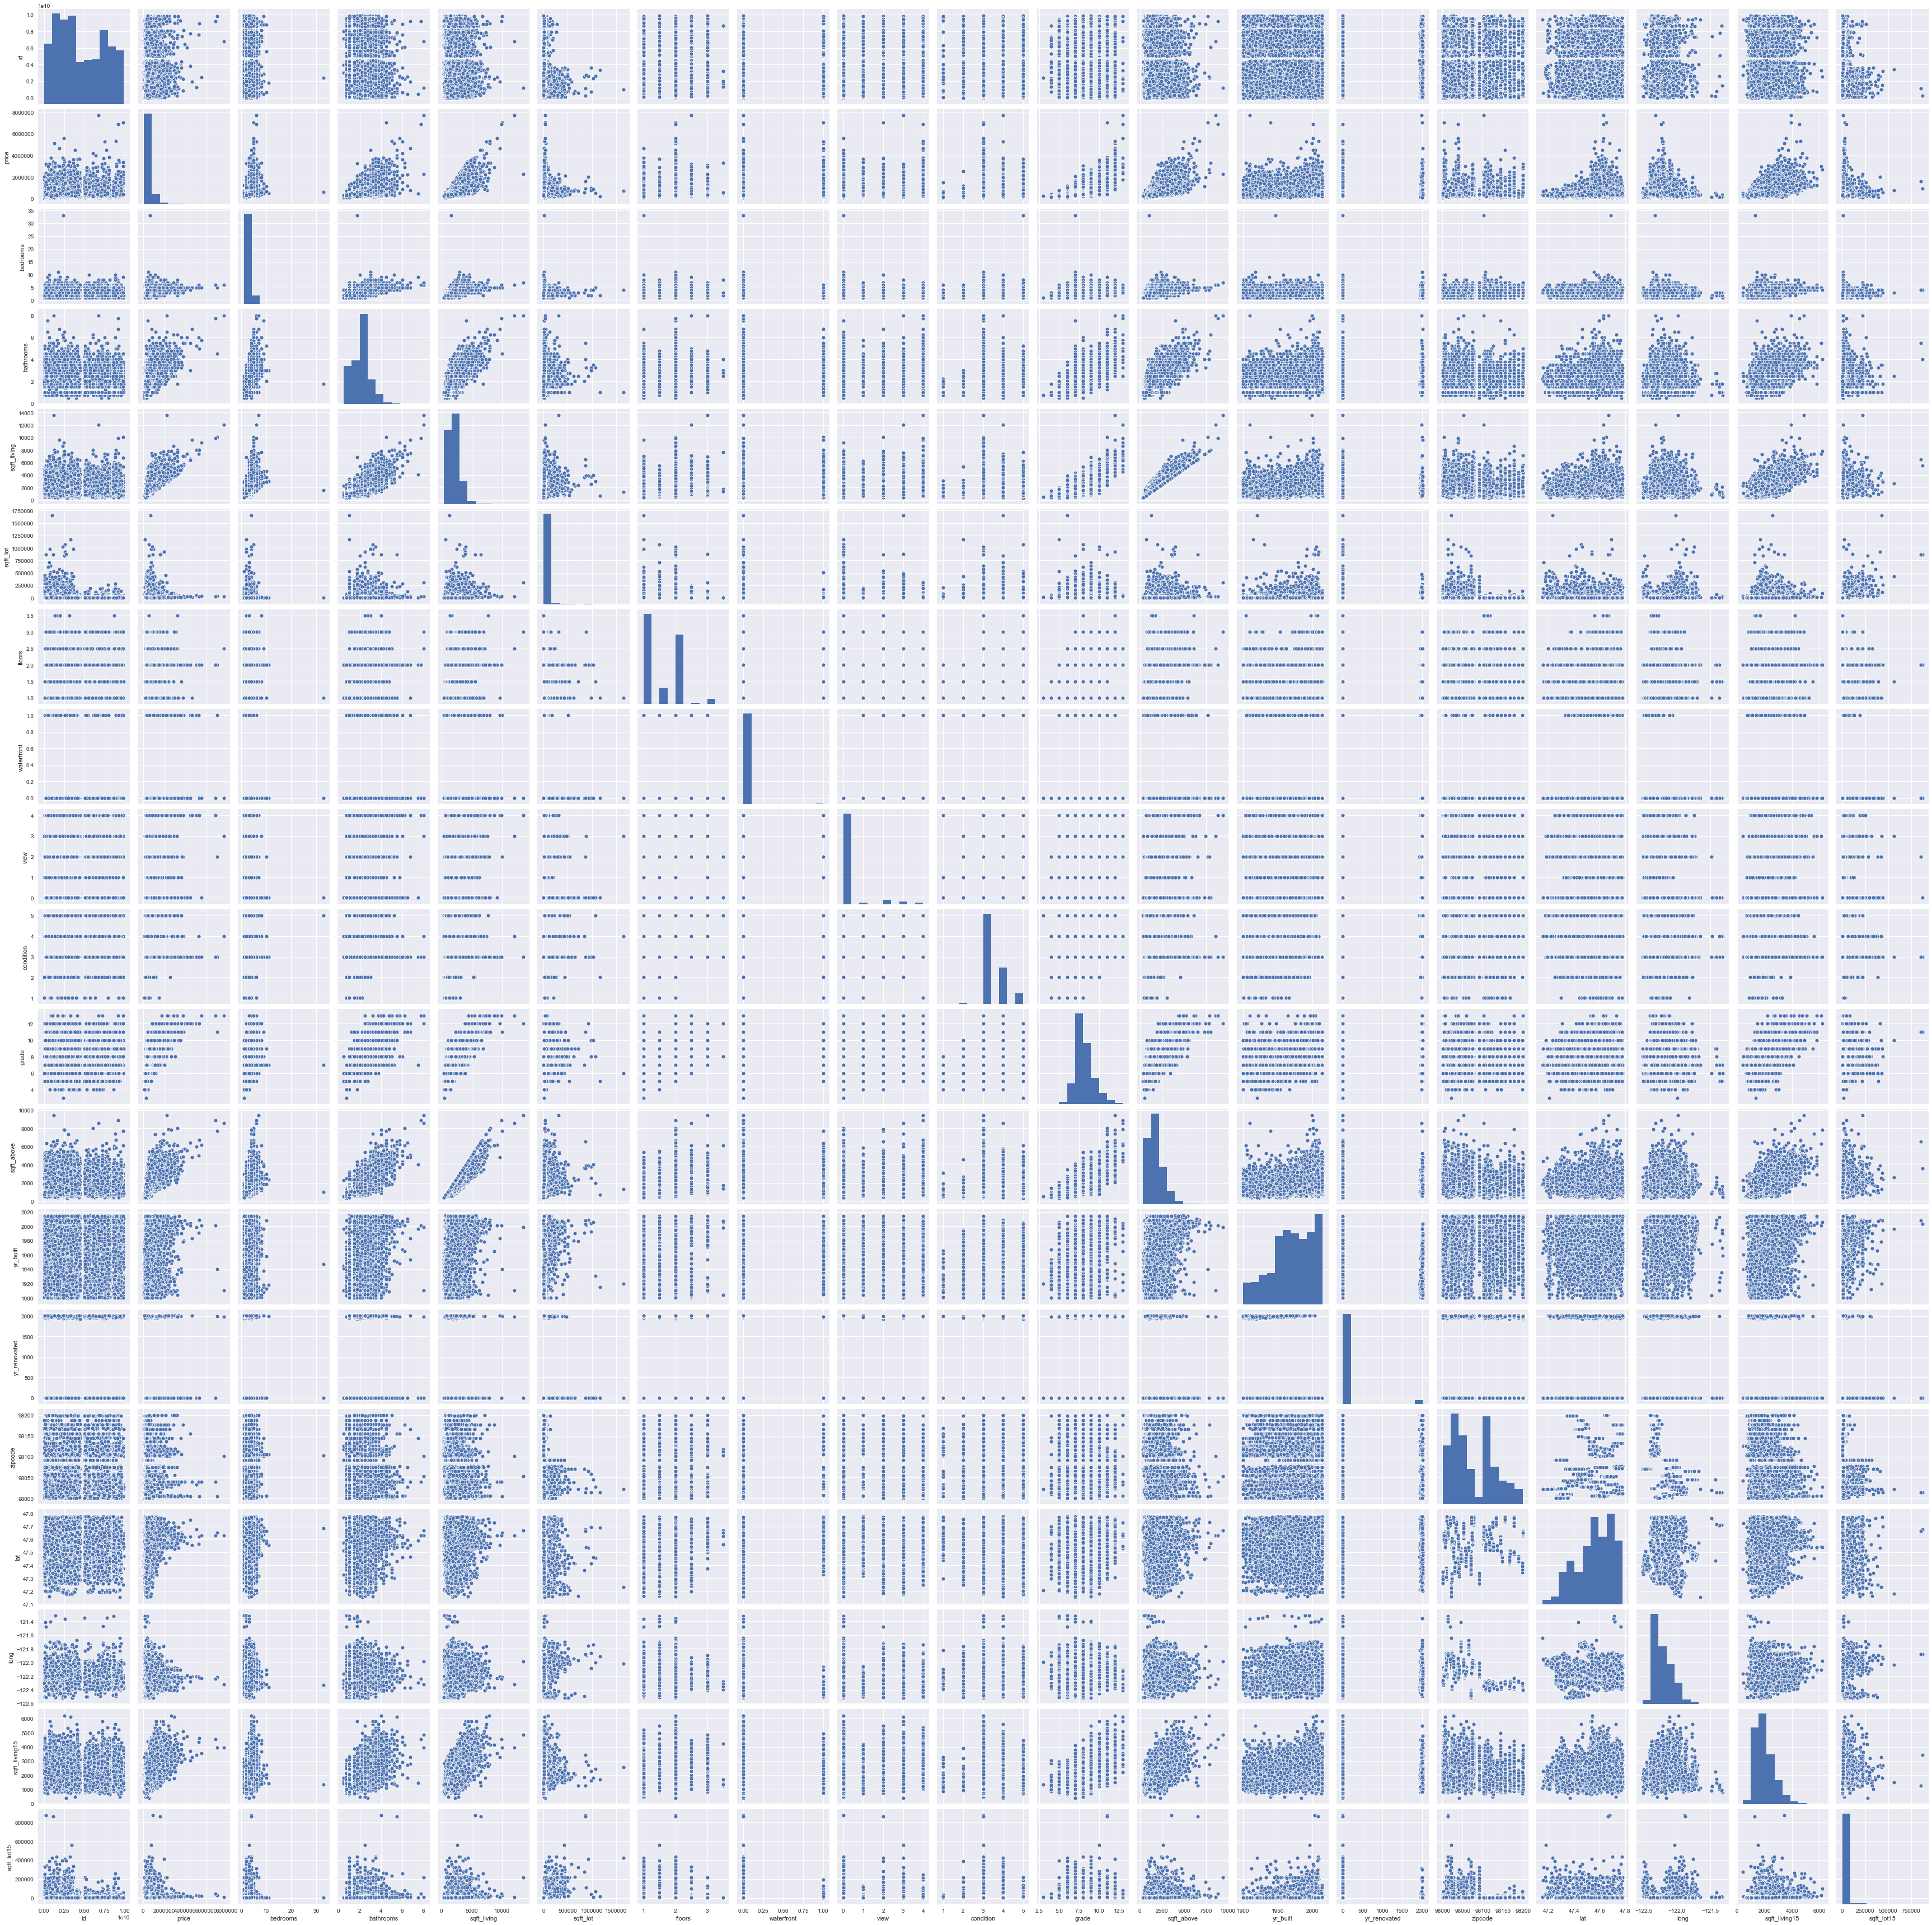

In [53]:
sns.pairplot(df)

In [5]:
X=df.drop(['price'],axis=1)
y=df['price']

In [6]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0             3       1.00         1180      5650     1.0         0.0   
1             3       2.25         2570      7242     2.0         0.0   
2             2       1.00          770     10000     1.0         0.0   
3             4       3.00         1960      5000     1.0         0.0   
4             3       2.00         1680      8080     1.0         0.0   
...         ...        ...          ...       ...     ...         ...   
21592         3       2.50         1530      1131     3.0         0.0   
21593         4       2.50         2310      5813     2.0         0.0   
21594         2       0.75         1020      1350     2.0         0.0   
21595         3       2.50         1600      2388     2.0         0.0   
21596         2       0.75         1020      1076     2.0         0.0   

       condition  grade  yr_built  sqft_living15  
0              3      7      1955           1340  
1              3      7      1951           1690  
2              3      6      1933           2720  
3              5      7      1965           1360  
4              3      8      1987           1800  
...          ...    ...       ...            ...  
21592          3      8      2009           1530  
21593          3      8      2014           1830  
21594          3      7      2009           1020  
21595          3      8      2004           1410  
21596          3      7      2008           1020  

[21597 rows x 10 columns]

In [50]:
model = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+yr_built+sqft_living15', data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3568.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:47:35   Log-Likelihood:            -2.6374e+05
No. Observations:               19221   AIC:                         5.275e+05
Df Residuals:                   19210   BIC:                         5.276e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.781e+06   1.39e+05     48.780      0.000    6.51e+06    7.05e+06
bedrooms      -4.341e+04   2184.053    -19.878      0.000   -4.77e+04   -3.91e+04
bathrooms      5.208e+04   3703.226     14.063      0.000    4.48e+04    5.93e+04
sqft_living     172.2060      3.852     44.710      0.000     164.657     179.755
sqft_lot         -0.2766      0.040     -6.936      0.000      -0.355      -0.198
floors         2.411e+04   3711.299      6.496      0.000    1.68e+04    3.14e+04
waterfront     7.504e+05   1.85e+04     40.512      0.000    7.14e+05    7.87e+05
condition      1.952e+04   2658.241      7.343      0.000    1.43e+04    2.47e+04
grade          1.238e+05   2414.396     51.276      0.000    1.19e+05    1.29e+05
yr_built      -3887.0248     71.474    -54.383      0.000   -4027.121   -3746.929
sqft_living15    23.7856      3.782      6.288      0.000      16.372      31.200
==============================================================================
Omnibus:                    14555.905   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1031540.002
Skew:                           3.051   Prob(JB):                         0.00
Kurtosis:                      38.367   Cond. No.                     3.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


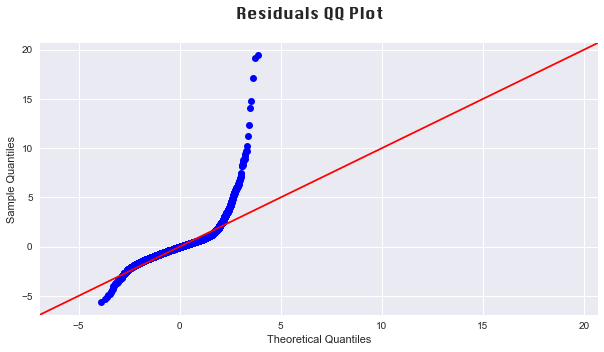

In [51]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

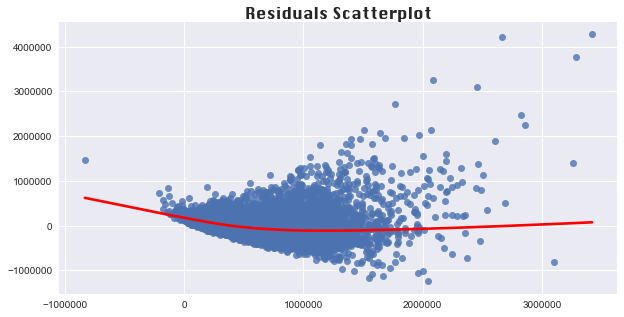

In [52]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [12]:
train_pred=linreg.predict(X_train_scaled)
test_pred=linreg.predict(X_test_scaled)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")


Train R2:0.6530134312039294
Test R2:0.6276584542166477
-------------
Train RMSE:215790.78616815837
Test RMSE:226020.2475186981


In [15]:
categorical=['condition','grade']

In [16]:
df[categorical]

condition  grade
0              3      7
1              3      7
2              3      6
3              5      7
4              3      8
...          ...    ...
21592          3      8
21593          3      8
21594          3      7
21595          3      8
21596          3      7

[21597 rows x 2 columns]

In [17]:
df_cate=pd.get_dummies(df,columns=categorical,drop_first=True)

In [18]:
df_cate

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  yr_built  sqft_living15  condition_2  ...  grade_4  \
0             0.0      1955           1340            0  ...        0   
1             0.0      1951           1690            0  ...        0   
2             0.0      1933           2720            0  ...        0   
3             0.0      1965           1360            0  ...        0   
4             0.0      1987           1800            0  ...        0   
...           ...       ...            ...          ...  ...      ...   
21592         0.0      2009           1530            0  ...        0   
21593         0.0      2014           1830            0  ...        0   
21594         0.0      2009           1020            0  ...        0   
21595         0.0      2004           1410            0  ...        0   
21596         0.0      2008           1020            0  ...        0   

       grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  \
0            0        0        1        0        0         0         0   
1            0        0        1        0        0         0         0   
2            0        1        0        0        0         0         0   
3            0        0        1        0        0         0         0   
4            0        0        0        1        0         0         0   
...        ...      ...      ...      ...      ...       ...       ...   
21592        0        0        0        1        0         0         0   
21593        0        0        0        1        0         0         0   
21594        0        0        1        0        0         0         0   
21595        0        0        0        1        0         0         0   
21596        0        0        1        0        0         0         0   

       grade_12  grade_13  
0             0         0  
1             0         0  
2             0         0  
3             0         0  
4             0         0  
...         ...       ...  
21592         0         0  
21593         0         0  
21594         0         0  
21595         0         0  
21596         0         0  

[21597 rows x 23 columns]

In [19]:
X=df_cate.drop(['price'],axis=1)
y=df_cate['price']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
linreg1=LinearRegression()
linreg1.fit(X_train_scaled,y_train)

LinearRegression()

In [23]:
train_pred=linreg1.predict(X_train_scaled)
test_pred=linreg1.predict(X_test_scaled)

In [24]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6822495789525762
Test R2:0.6486606828210209
-------------
Train RMSE:206499.79859020686
Test RMSE:219553.30242118688


In [25]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.256804  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront     0.264306 -0.002127   0.063629     0.104637  0.021459  0.020797   
condition      0.036056  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.667951  0.356563   0.665838     0.762779  0.114731  0.458794   
yr_built       0.053953  0.155670   0.507173     0.318152  0.052946  0.489193   
sqft_living15  0.585241  0.393406   0.569884     0.756402  0.144763  0.280102   

               waterfront  condition     grade  yr_built  sqft_living15  
price            0.264306   0.036056  0.667951  0.053953       0.585241  
bedrooms        -0.002127   0.026496  0.356563  0.155670       0.393406  
bathrooms        0.063629  -0.126479  0.665838  0.507173       0.569884  
sqft_living      0.104637  -0.059445  0.762779  0.318152       0.756402  
sqft_lot         0.021459  -0.008830  0.114731  0.052946       0.144763  
floors           0.020797  -0.264075  0.458794  0.489193       0.280102  
waterfront       1.000000   0.016648  0.082818 -0.024487       0.083823  
condition        0.016648   1.000000 -0.146896 -0.361592      -0.093072  
grade            0.082818  -0.146896  1.000000  0.447865       0.713867  
yr_built        -0.024487  -0.361592  0.447865  1.000000       0.326377  
sqft_living15    0.083823  -0.093072  0.713867  0.326377       1.000000

In [26]:
abs(df.corr()) > 0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True         True     False   False   
sqft_living    False     False       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
yr_built       False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   

               waterfront  condition  grade  yr_built  sqft_living15  
price               False      False  False     False          False  
bedrooms            False      False  False     False          False  
bathrooms           False      False  False     False          False  
sqft_living         False      False   True     False           True  
sqft_lot            False      False  False     False          False  
floors              False      False  False     False          False  
waterfront           True      False  False     False          False  
condition           False       True  False     False          False  
grade               False      False   True     False          False  
yr_built            False      False  False      True          False  
sqft_living15       False      False  False     False           True

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000  0.004814   
floors         0.256804  0.177944   0.502582     0.353953  0.004814  1.000000   
waterfront     0.264306  0.002127   0.063629     0.104637  0.021459  0.020797   
condition      0.036056  0.026496   0.126479     0.059445  0.008830  0.264075   
grade          0.667951  0.356563   0.665838     0.762779  0.114731  0.458794   
yr_built       0.053953  0.155670   0.507173     0.318152  0.052946  0.489193   
sqft_living15  0.585241  0.393406   0.569884     0.756402  0.144763  0.280102   

               waterfront  condition     grade  yr_built  sqft_living15  
price            0.264306   0.036056  0.667951  0.053953       0.585241  
bedrooms         0.002127   0.026496  0.356563  0.155670       0.393406  
bathrooms        0.063629   0.126479  0.665838  0.507173       0.569884  
sqft_living      0.104637   0.059445  0.762779  0.318152       0.756402  
sqft_lot         0.021459   0.008830  0.114731  0.052946       0.144763  
floors           0.020797   0.264075  0.458794  0.489193       0.280102  
waterfront       1.000000   0.016648  0.082818  0.024487       0.083823  
condition        0.016648   1.000000  0.146896  0.361592       0.093072  
grade            0.082818   0.146896  1.000000  0.447865       0.713867  
yr_built         0.024487   0.361592  0.447865  1.000000       0.326377  
sqft_living15    0.083823   0.093072  0.713867  0.326377       1.000000

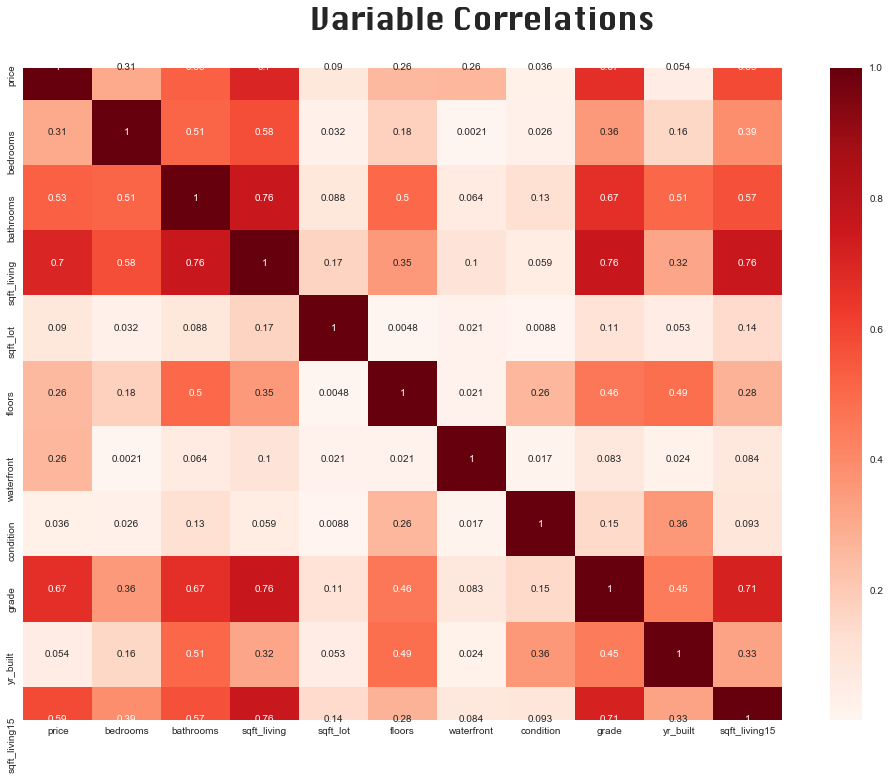

In [27]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
corr

In [28]:
# features = []
# correlations = []
# for idx, correlation in corr['price'].T.iteritems():
#     if correlation >= .30 and idx != 'price':
#         features.append(idx)
#         correlations.append(correlation)
# corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

# Multicollinear_Features = []
# Multicollinear_Corr = []
# def check_multicollinearity(feature):
#     for idx, correlation in corr[feature].T.iteritems():
#         if correlation >= .80 and idx != feature:
#             Multicollinear_Features.append([feature, idx])
#             Multicollinear_Corr.append(correlation)
            
# for feature in corr:
#     check_multicollinearity(feature)
# MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})
# print('Multicollinear Features')
# display(MC_df)
# print('Correlations with Price')
# display(corr_with_price)


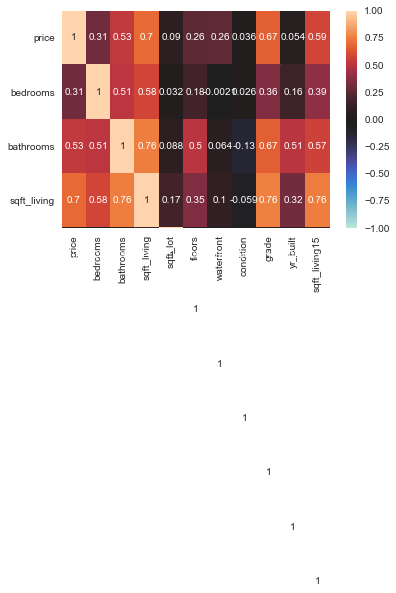

In [29]:
figsize=(20,20)
ax=sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, center= 0)
ax.set_ylim(4,0)
plt.show()

In [30]:
X=df_cate.drop(['price','sqft_living'],axis=1)
y=df_cate['price']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [33]:
linreg2=LinearRegression()
linreg2.fit(X_train_scaled,y_train)

LinearRegression()

In [34]:
train_pred=linreg2.predict(X_train_scaled)
test_pred=linreg2.predict(X_test_scaled)

In [35]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6648836977031143
Test R2:0.6208059698489116
-------------
Train RMSE:212067.6103928832
Test RMSE:228090.5766573212


In [36]:
df_cate.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'yr_built', 'sqft_living15', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13'],
      dtype='object')

In [37]:
# fig = plt.figure()
# fig, axes = plt.subplots(nrows = 1, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

# fig.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
# fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

# axes[0][0].scatter(bathrooms, price, c = price, marker = "x")
# axes[0][0].set_xlabel('Bathrooms')

# axes[0][1].scatter(bedrooms, price, c = price, marker = "x")
# axes[0][1].set_xlabel('Bedrooms')

# axes[0][2].scatter(sqft_living, price, c = price, marker = "x")
# axes[0][2].set_xlabel('sqft_living')

# axes[0][3].scatter(sqft_lot, price, c = price, marker = "x")
# axes[0][3].set_xlabel('sqft_lot')


# # cbar_ax = fig.add_axes([1, 0.22, 0.05, 0.7])

# fig.colorbar(sc, cax=cbar_ax)

# fig.tight_layout()
# plt.show()


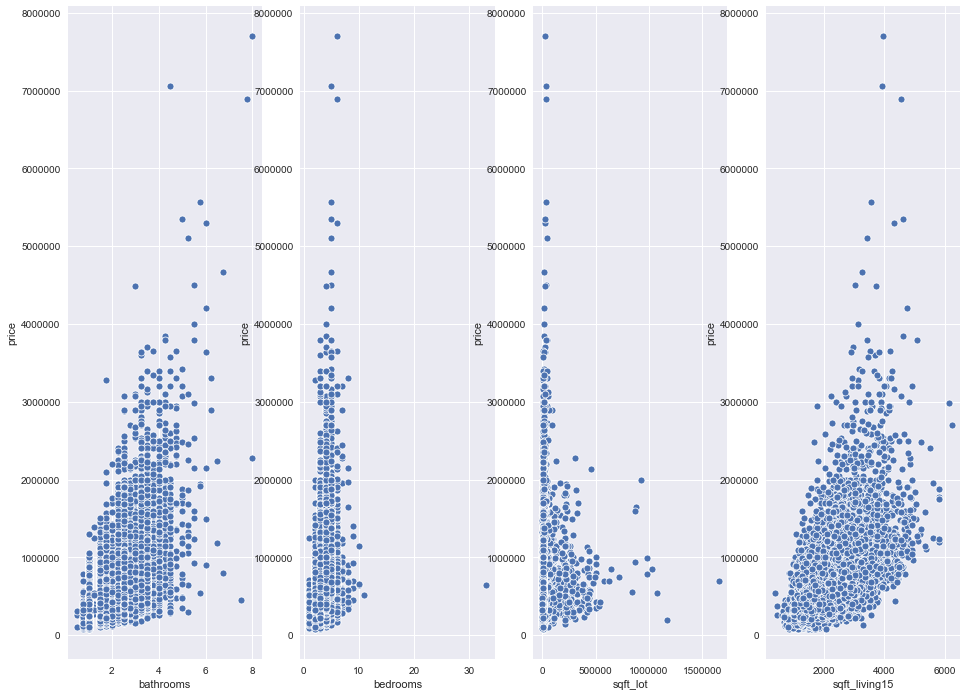

In [38]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(1,4,1)
sns.scatterplot(x="bathrooms", y="price", data=df_cate);
ax = plt.subplot(1,4,2)
sns.scatterplot(x="bedrooms", y="price", data=df_cate);
ax = plt.subplot(1,4,3)
sns.scatterplot(x="sqft_lot", y="price", data=df_cate);
ax = plt.subplot(1,4,4)
sns.scatterplot(x="sqft_living15", y="price", data=df_cate);



In [39]:
X=df_cate.drop(['price','sqft_living'],axis=1)
y=df_cate['price']

In [41]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import train_test_split

# # from yellowbrick.datasets import load_concrete
# from yellowbrick.regressor import ResidualsPlot

# # # Load a regression dataset
# X, y = load_concrete()

# # # Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Instantiate the linear model and visualizer
# model = Ridge()
# visualizer = ResidualsPlot(model)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show() 

In [42]:
# visualizer = ResidualsPlot(model, hist=False)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
# visualizer.show()

In [48]:
Model_1 = ols(formula="price ~ bathrooms + sqft_living15", data=df_cate).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     7118.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:            -3.0192e+05
No. Observations:               21597   AIC:                         6.039e+05
Df Residuals:                   21594   BIC:                         6.039e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.981e+05   6493.618    -30.505      0.000   -2.11e+05   -1.85e+05
bathrooms      1.361e+05   3071.381     44.317      0.000     1.3e+05    1.42e+05
sqft_living15   226.7110      3.447     65.775      0.000     219.955     233.467
==============================================================================
Omnibus:                    18854.338   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1493368.941
Skew:                           3.822   Prob(JB):                         0.00
Kurtosis:                      43.014   Cond. No.                     7.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


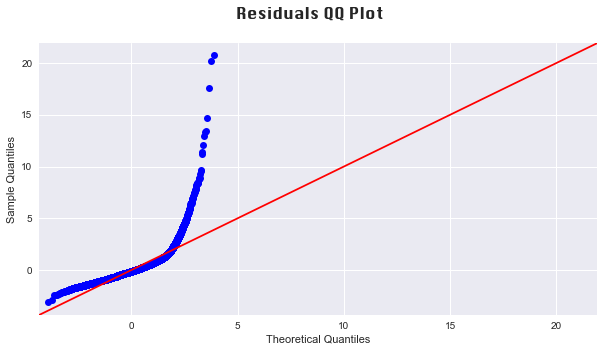

In [49]:
residuals = Model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()